In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="D:/MTECH CSE/MLDM Project/airflight_train (1).csv"
data=pd.read_csv(path)
df=pd.DataFrame(data)

In [3]:
df

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,NaN,Medium,Cloudy,121,Special Offer,0.60,487.67


In [4]:
df.drop(labels=['Flight_ID','Holiday_Season'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [6]:
df['Airline'].value_counts()

Airline
Airline A    13863
Airline C    13809
Airline B    13755
Name: count, dtype: int64

In [7]:
df['Demand'].value_counts()

Demand
Low       28946
Medium     8954
High       6783
Name: count, dtype: int64

In [10]:
df['Promotion_Type'].value_counts()

Promotion_Type
No Offer         15215
Special Offer    14896
Discount         14889
Name: count, dtype: int64

In [9]:
df['Demand'] = df['Demand'].fillna('Low')
df['Promotion_Type'] = df['Promotion_Type'].fillna('No Offer')

In [97]:
df.dropna(inplace=True)

In [98]:
df.shape

(40004, 17)

In [99]:
def encodeDepArr(x):
    t = pd.to_datetime(x, format='%H:%M')
    hr = t.hour
    if 5 <= hr < 12:
        return "Morning"
    elif 12 <= hr < 16:
        return "Afternoon"
    elif 16 <= hr < 20:
        return "Evening"
    elif 20 <= hr < 23:
        return "Night"
    else:
        return "Late Night"
df[['Departure_Time', 'Arrival_Time']] = df[['Departure_Time', 'Arrival_Time']].applymap(encodeDepArr)
df

,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,Night,Late Night,5.29,Airbus A320,0,Wednesday,March,Low,Rain,107,No Offer,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,Morning,Afternoon,4.41,Boeing 787,1,Sunday,September,High,Cloudy,131,No Offer,0.52,442.17
4,Airline B,Michaelport,Onealborough,5558.0,Night,Morning,8.09,Boeing 737,1,Thursday,January,Low,Clear,181,No Offer,1.09,804.35
6,Airline B,West Samanthaland,Port Brentport,3274.0,Evening,Night,5.60,Boeing 787,0,Wednesday,January,Low,Clear,248,Special Offer,1.03,429.53
8,Airline C,Bryanland,Jessebury,1116.0,Morning,Afternoon,2.46,Airbus A320,0,Wednesday,June,Medium,Cloudy,56,No Offer,0.85,385.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,Night,Late Night,5.70,Boeing 787,1,Sunday,May,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,Night,Morning,12.97,Airbus A320,1,Friday,December,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,Late Night,Morning,8.81,Boeing 777,1,Wednesday,October,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,Afternoon,Evening,6.21,Boeing 737,0,Saturday,June,Medium,Cloudy,121,Special Offer,0.60,487.67


In [100]:
df['Arrival_Time'].value_counts()

Arrival_Time
Morning       11725
Late Night     9956
Evening        6792
Afternoon      6695
Night          4836
Name: count, dtype: int64

In [101]:
df['Departure_Time'].value_counts()

Departure_Time
Morning       11692
Late Night    10048
Afternoon      6728
Evening        6542
Night          4994
Name: count, dtype: int64

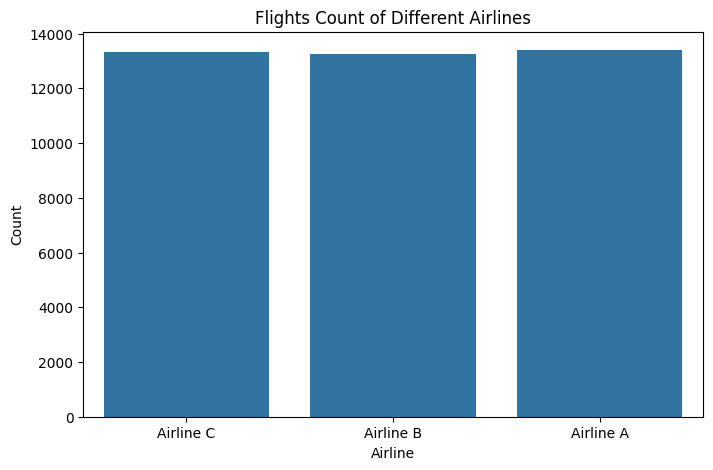

In [102]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Airline'],data=df)
plt.title('Flights Count of Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

C:\Users\Ehtesham Ashraf\AppData\Local\Temp\ipykernel_34216\2716229306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Demand'],y=df['Flight_Price'],palette='hls')


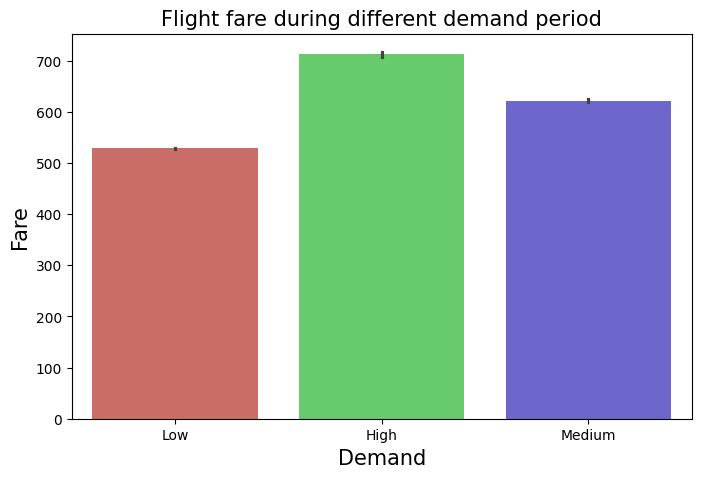

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Demand'],y=df['Flight_Price'],palette='hls')
plt.title('Flight fare during different demand period',fontsize=15)
plt.xlabel('Demand',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

C:\Users\Ehtesham Ashraf\AppData\Local\Temp\ipykernel_34216\2825970922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Weather_Conditions'],y=df['Flight_Price'],palette='hls')


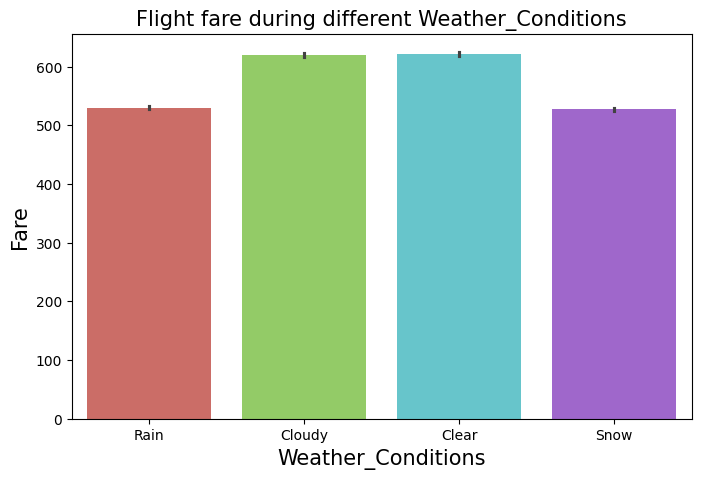

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Weather_Conditions'],y=df['Flight_Price'],palette='hls')
plt.title('Flight fare during different Weather_Conditions',fontsize=15)
plt.xlabel('Weather_Conditions',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

In [105]:
lst=df["Aircraft_Type"].unique()
for i in range(0,len(lst)):
    l=df[df["Aircraft_Type"]==lst[i]]["Passenger_Count"].mean()
    print(lst[i])
    print(int(l))

Airbus A320
175
Boeing 787
174
Boeing 737
174
Airbus A380
174
Boeing 777
175


C:\Users\Ehtesham Ashraf\AppData\Local\Temp\ipykernel_34216\3725000579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Aircraft_Type'],y=df['Passenger_Count'],palette='hls')


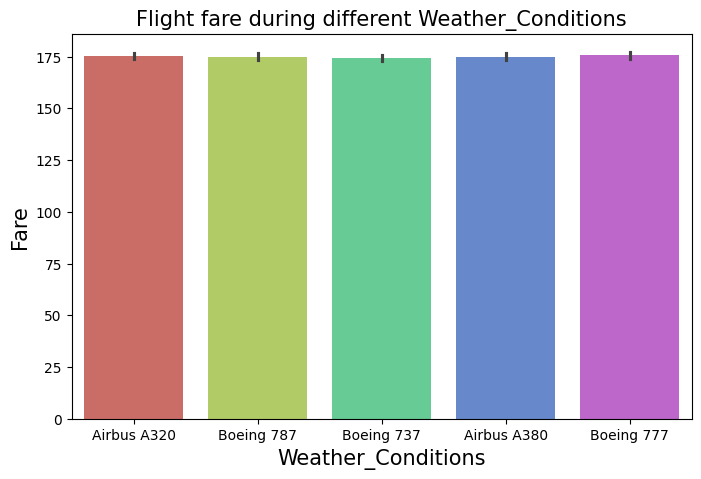

In [106]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Aircraft_Type'],y=df['Passenger_Count'],palette='hls')
plt.title('Flight fare during different Weather_Conditions',fontsize=15)
plt.xlabel('Weather_Conditions',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

C:\Users\Ehtesham Ashraf\AppData\Local\Temp\ipykernel_34216\1050830271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Number_of_Stops'],y=df['Flight_Price'],palette='hls')


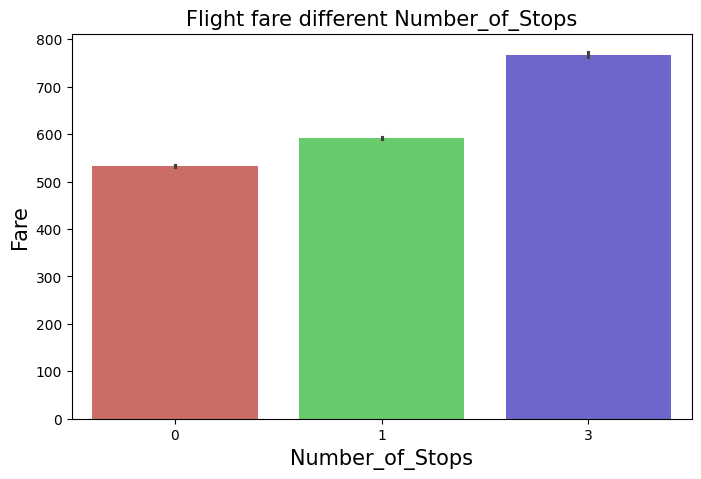

In [107]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Number_of_Stops'],y=df['Flight_Price'],palette='hls')
plt.title('Flight fare different Number_of_Stops',fontsize=15)
plt.xlabel('Number_of_Stops',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

C:\Users\Ehtesham Ashraf\AppData\Local\Temp\ipykernel_34216\2315715015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Day_of_Week'],palette='hls')


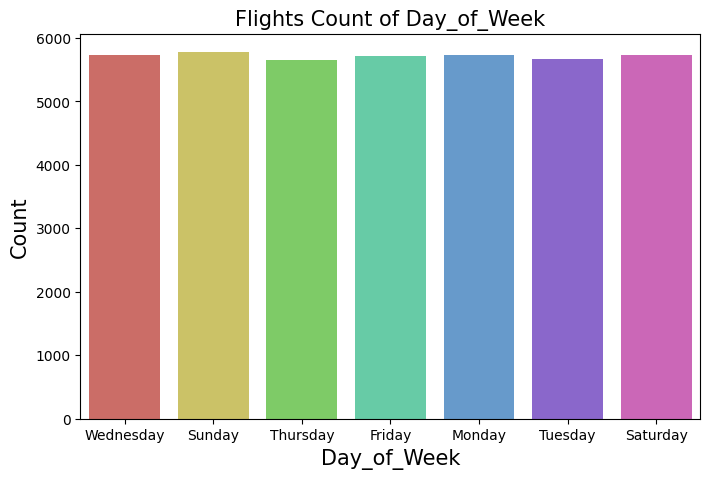

In [108]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Day_of_Week'],palette='hls')
plt.title('Flights Count of Day_of_Week',fontsize=15)
plt.xlabel('Day_of_Week',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40004 entries, 1 to 44999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             40004 non-null  object 
 1   Departure_City      40004 non-null  object 
 2   Arrival_City        40004 non-null  object 
 3   Distance            40004 non-null  float64
 4   Departure_Time      40004 non-null  object 
 5   Arrival_Time        40004 non-null  object 
 6   Duration            40004 non-null  float64
 7   Aircraft_Type       40004 non-null  object 
 8   Number_of_Stops     40004 non-null  int64  
 9   Day_of_Week         40004 non-null  object 
 10  Month_of_Travel     40004 non-null  object 
 11  Demand              40004 non-null  object 
 12  Weather_Conditions  40004 non-null  object 
 13  Passenger_Count     40004 non-null  int64  
 14  Promotion_Type      40004 non-null  object 
 15  Fuel_Price          40004 non-null  float64
 16  Flight_Pr

In [110]:
df_bk=df.copy()

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        #df[col] = df[col].apply(pd.to_numeric, errors='coerce')
        df[col]=le.fit_transform(df[col])

In [112]:
df

,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,2,8901,11782,2942.0,4,2,5.29,0,0,6,7,1,2,107,1,1.08,423.13
2,1,17430,14257,2468.0,3,0,4.41,4,1,3,11,0,1,131,1,0.52,442.17
4,1,9799,13759,5558.0,4,3,8.09,2,1,4,4,1,0,181,1,1.09,804.35
6,1,20949,14391,3274.0,1,4,5.60,4,0,6,4,1,0,248,2,1.03,429.53
8,2,1269,6390,1116.0,3,0,2.46,0,0,6,6,2,1,56,1,0.85,385.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1,14562,9505,3884.0,4,2,5.70,4,1,3,8,1,0,263,0,0.69,417.18
44996,0,4044,4395,9191.0,4,3,12.97,0,1,0,2,1,3,168,0,0.74,687.03
44997,2,9959,20585,6757.0,2,3,8.81,3,1,6,10,1,3,244,2,0.83,547.39
44998,1,19160,5012,3587.0,0,1,6.21,2,0,2,6,2,1,121,2,0.60,487.67


In [113]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [115]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
x_train = stsc.fit_transform(x_train)
x_test = stsc.transform(x_test)

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [117]:
mdldctr=DecisionTreeRegressor()
mdlknnr1=KNeighborsRegressor(n_neighbors=5)

In [118]:
mdldctr.fit(x_train,y_train)
mdlknnr1.fit(x_train,y_train)

ypred1=mdldctr.predict(x_test)
ypred2=mdlknnr1.predict(x_test)

In [136]:
from sklearn import metrics
p1=round(mdldctr.score(x_test,y_test),3)
print(f"R-Squared for the Decision tree regressor = {p1}.")
p2=round(mdlknnr1.score(x_test,y_test),3)
print(f"R-Squared for the KNearestNeighbor regressor with K=5 = {p2}.")

R-Squared for the Decision tree regressor = 0.957.
R-Squared for the KNearestNeighbor regressor with K=5 = 0.903.


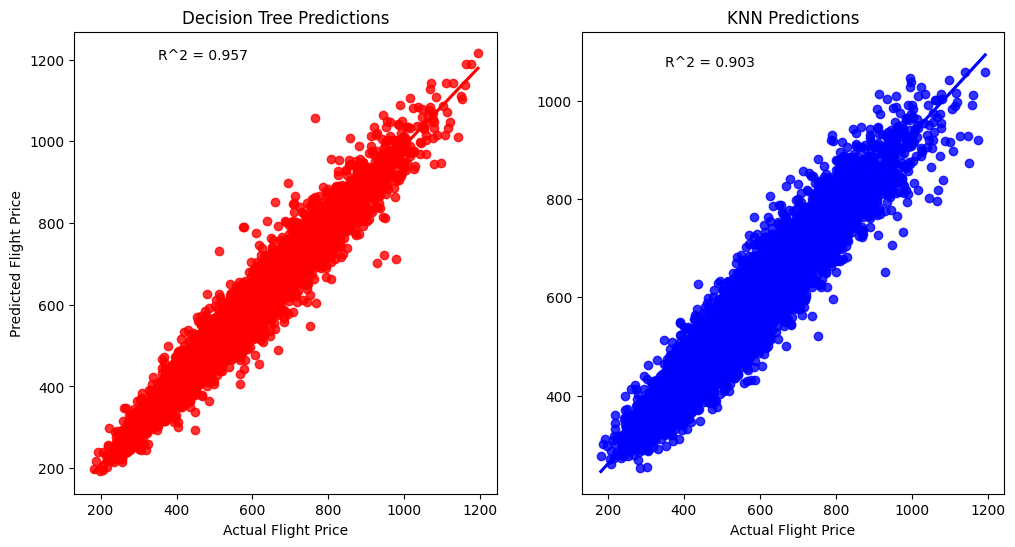

In [144]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("Decision Tree Predictions")
plt.ylabel("Predicted Flight Price")
sns.regplot(x=y_test,y=ypred1,color='red')
plt.text(350,1200,f"R^2 = {p1}")
plt.xlabel("Actual Flight Price")
plt.subplot(122)
sns.regplot(x=y_test,y=ypred2,color='blue')
plt.text(350,1070,f"R^2 = {p2}")
plt.title("KNN Predictions")
plt.xlabel("Actual Flight Price")
plt.show()

In [146]:
from sklearn import metrics
print("Performance metrics for the DecisionTree Regressor:")
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, ypred1)*100,3),"%")
print('Mean Absolute Error (MAE): $', round(metrics.mean_absolute_error(y_test, ypred1),2))
print('Mean Squared Error (MSE): $', round(metrics.mean_squared_error(y_test, ypred1),2))
print('Root Mean Squared Error (RMSE): $', round(np.sqrt(metrics.mean_squared_error(y_test, ypred1)),2))

print()
print("Performance metrics for the KNN Regressor:")
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, ypred2)*100,3),"%")
print('Mean Absolute Error (MAE): $', round(metrics.mean_absolute_error(y_test, ypred2),2))
print('Mean Squared Error (MSE): $', round(metrics.mean_squared_error(y_test, ypred2),2))
print('Root Mean Squared Error (RMSE): $', round(np.sqrt(metrics.mean_squared_error(y_test, ypred2)),2))

Performance metrics for the DecisionTree Regressor:
Mean Absolute Percentage Error (MAPE): 4.455 %
Mean Absolute Error (MAE): $ 24.62
Mean Squared Error (MSE): $ 1133.35
Root Mean Squared Error (RMSE): $ 33.67

Performance metrics for the KNN Regressor:
Mean Absolute Percentage Error (MAPE): 7.351 %
Mean Absolute Error (MAE): $ 39.11
Mean Squared Error (MSE): $ 2539.48
Root Mean Squared Error (RMSE): $ 50.39
